# テスト用ログデータ生成
## 0 から 2**32-1 の範囲で乱数を生成する

In [11]:
import numpy
numpy.random.randint(0,2**32-1)

2748654264

## IPv4アドレスをランダムに生成する

In [71]:
import socket
import struct


addr = numpy.random.randint(0,2**32-1)
socket.inet_ntoa(struct.pack("!I", addr)) 

struct.unpack("!I", socket.inet_aton('192.168.0.0'))[0]

3232235520

## 日付を生成する

In [16]:
import datetime
now = datetime.datetime.utcnow()
print(now)

2017-03-27 10:45:39.349400


In [18]:
now.timestamp()
int(now.timestamp())

1490579139

In [19]:
datetime.datetime.utcfromtimestamp(0)

datetime.datetime(1970, 1, 1, 0, 0)

## ログデータを生成する（日時, src IP, dest IP,src port, dst port, byte)

In [81]:
import pandas as pd
import datetime
import numpy
import socket
import struct
import csv
import time

now = datetime.datetime.utcnow()
# python3
# start = int(now.timestamp())
# python2
start = int(time.mktime(now.timetuple()))

ipmin = 0
ipmax = 2**32-1

ipmin = struct.unpack("!I", socket.inet_aton('192.168.0.0'))[0]
ipmax = struct.unpack("!I", socket.inet_aton('192.168.10.255'))[0]
offset=0
df = pd.DataFrame(columns=['time','src','dst','sport','dport','byte'])
counter = 0
for i in range(60):
    for j in range(numpy.random.randint(1,100)):
        src = numpy.random.randint(ipmin,ipmax)
        sport = numpy.random.randint(0,65535)
        dst =  numpy.random.randint(ipmin,ipmax)
        dport = numpy.random.randint(0,1023)
        for k in range(numpy.random.randint(1,10)):
            counter+=1
            nbyte = numpy.random.randint(0,500*1024)
            df.loc[counter] = [start+offset+i,src,dst,sport,dport,nbyte]

ipmin = struct.unpack("!I", socket.inet_aton('192.168.1.0'))[0]
ipmax = struct.unpack("!I", socket.inet_aton('192.168.1.255'))[0]

offset = 30
for i in range(10):
    for j in range(numpy.random.randint(10,100)):
        src = numpy.random.randint(ipmin,ipmax)
        sport = numpy.random.randint(0,65535)
        dst =  numpy.random.randint(ipmin,ipmax)
        dport = numpy.random.randint(0,1023)
        for k in range(numpy.random.randint(1,10)): 
            counter+=1
            nbyte = numpy.random.randint(0,500*1024)
            df.loc[counter] = [start+offset+i,src,dst,sport,dport,nbyte]
            
df = df.sort_values(by='time')
df.to_csv('tmp/testlog.log',index=False)

NameError: name 'FALSE' is not defined

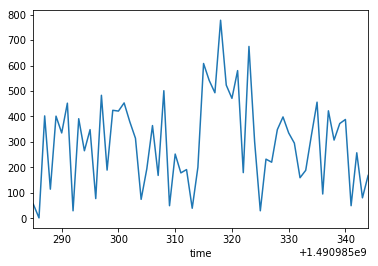

In [83]:
import pandas as pd
import numpy as np

%matplotlib inline

dfg = df.groupby('time')['src'].count()
dfg.plot()



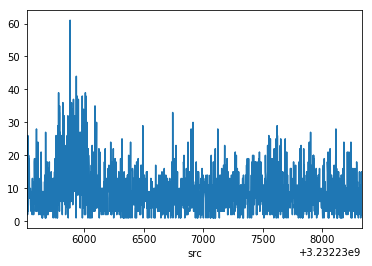

In [84]:
dfg = df.groupby('src')['src'].count()
dfg.plot()
